In [2]:
import pandas as pd
from nltk.corpus import cmudict

In [3]:
freq_data = pd.read_csv("SUBTLEXus74286wordstextversion.txt", sep="	", names=["Word","FREQcount","CDcount","FREQlow","Cdlow","Freq_Per_Mil","Log_Freq","SUBTLCD","Lg10CD"])
freq_data = freq_data[["Word","Freq_Per_Mil","Log_Freq"]]

In [4]:
freq_data['Word_Length']  = freq_data['Word'].str.len()
# freq_data_full['Word_Syll'] = freq_data_full['Word'].apply(lambda x: nsyl(x))
# freq_data_full

In [5]:
freq_data.to_csv("big_df_freqs_chars.csv",index_label=False)

In [6]:
freq_data_full = pd.read_csv("big_df_freqs_chars.csv")

In [7]:
freq_data_full

,Word,Freq_Per_Mil,Log_Freq,Word_Length
0,the,29449.18,6.1766,3.0
1,to,22677.84,6.0632,2.0
2,a,20415.27,6.0175,1.0
3,you,41857.12,6.3293,3.0
4,and,13387.84,5.8343,3.0
...,...,...,...,...
74281,Zoroastrian,0.02,0.3010,11.0
74282,Zoroastrianism,0.02,0.3010,14.0
74283,zugzwang,0.02,0.3010,8.0
74284,zygotes,0.02,0.3010,7.0


In [8]:
#Calculate correlations 

freq_data_full = freq_data_full.astype({'Word_Length':'float'})

corr_length = freq_data_full["Log_Freq"].corr(freq_data_full["Word_Length"])
print("the correlation between frequency and word length is", corr_length)

the correlation between frequency and word length is -0.30335249964747985


In [9]:
import seaborn as sns
from scipy import stats

sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='Word_Length', ylabel='Log_Freq'>

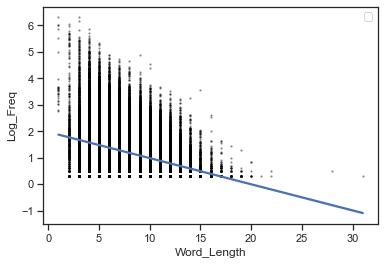

In [10]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(freq_data_full["Log_Freq"],freq_data_full["Word_Length"])

ax = sns.regplot(y = freq_data_full["Log_Freq"], x = freq_data_full["Word_Length"],
            scatter_kws = {"color": "black", "alpha": 0.3,'s':2},
            ci = 95) 
ax.legend()

ax

<Axes: xlabel='Log_Freq_Per_Mil1', ylabel='Word_Syll'>

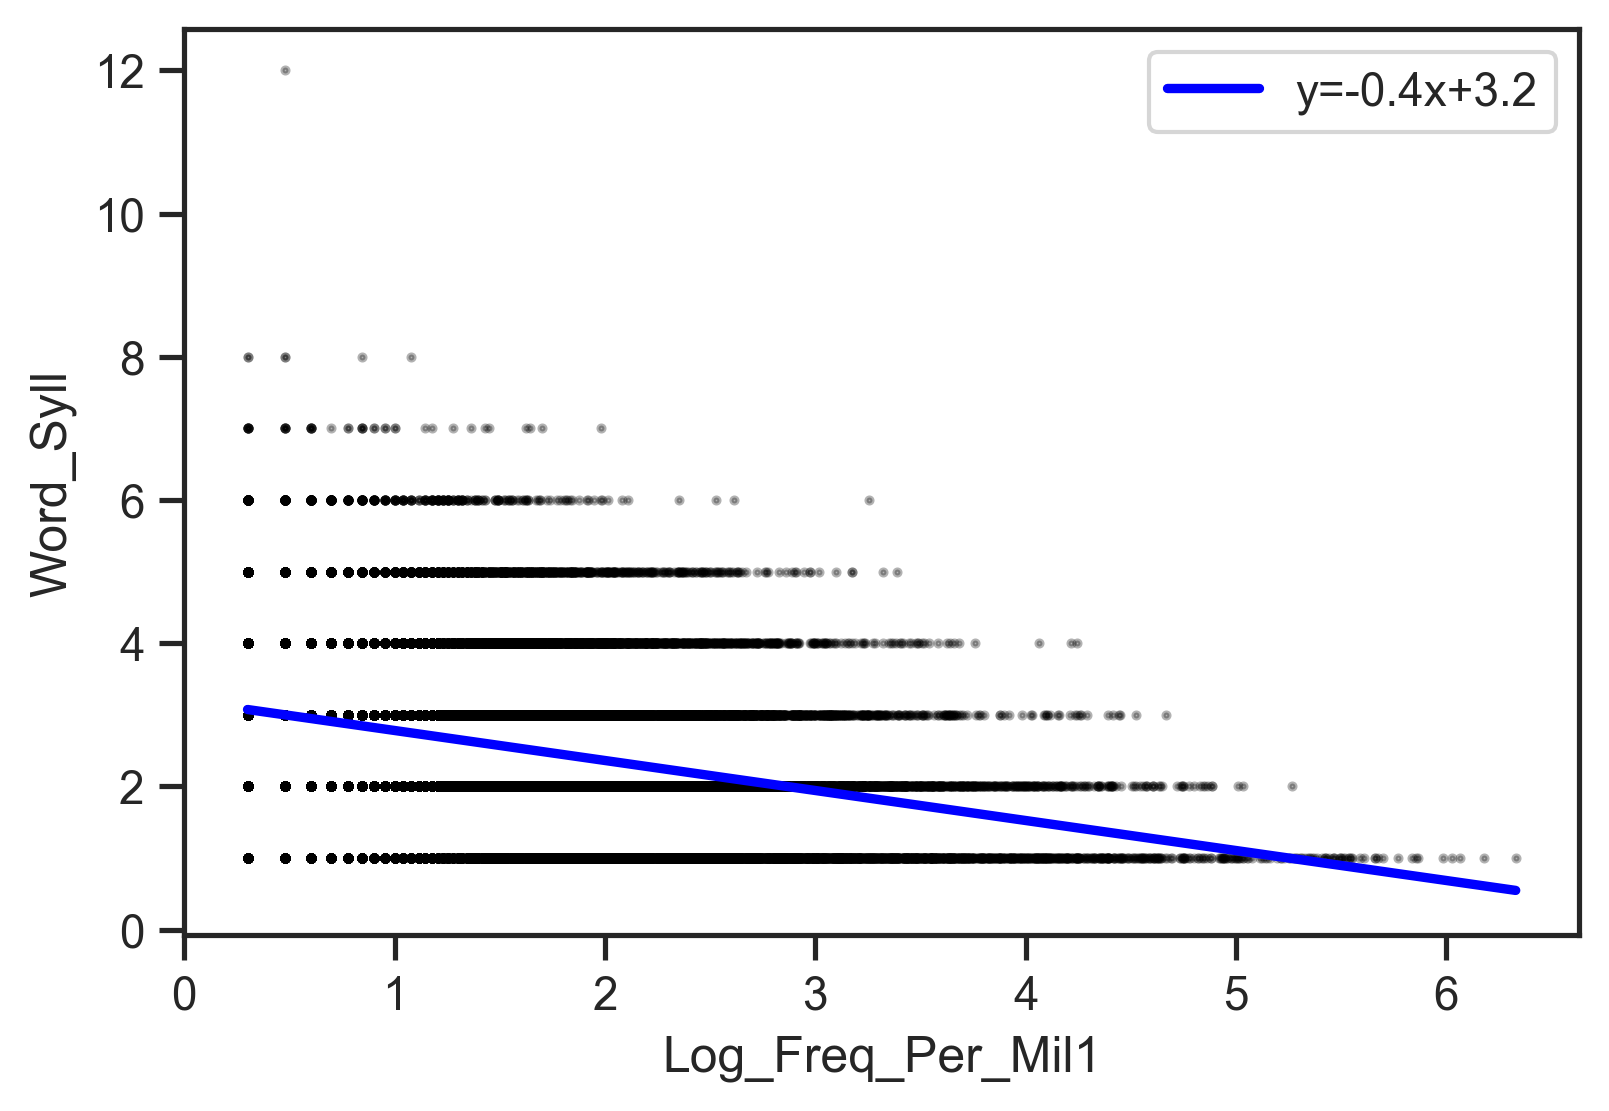

In [ ]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(freq_data_full["Log_Freq_Per_Mil1"],freq_data_full["Word_Syll"])

ax = sns.regplot(x = freq_data_full["Log_Freq_Per_Mil1"], y = freq_data_full["Word_Syll"],
            scatter_kws = {"color": "black", "alpha": 0.3,'s':2},
            line_kws = {"color": "blue", 'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)},
            ci = 95) 
ax.legend()

ax